In [2]:
# Load packages
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Import data
iris = pd.read_csv("C:/Users/Tara/Downloads/Iris.csv")

# View column names
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Understand datatypes
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Convert species to numeric form
iris['Species'] = iris['Species'].map({  'Iris-setosa' : 0, 
                                          'Iris-versicolor' : 1,
                                          'Iris-virginica' : 2
                                            })
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [6]:
# Seperate the dependent variable, species, from the independent varaibles
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]  

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
# Implement Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
# Summary of model predictions
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


In [11]:
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [12]:
# Accuracy score
print('Accuracy is', accuracy_score(y_pred, y_test))

Accuracy is 1.0


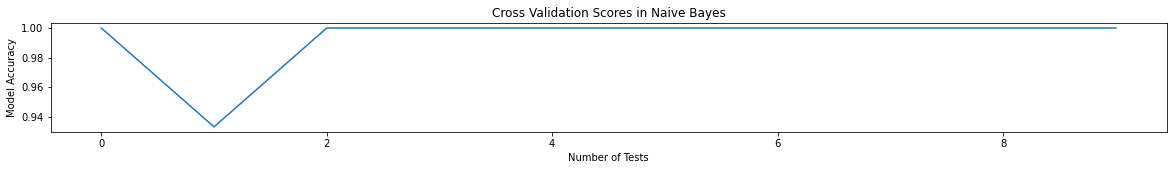

In [13]:
plt.figure(figsize = (20, 2))
plt.title("Cross Validation Scores in Naive Bayes")
plt.xlabel("Number of Tests")
plt.ylabel("Model Accuracy")
plt.plot(scores);
plt.show();

In [14]:
# Resources:
#    Cross-Validation. (n.d.). Ritchie Ng. 
#    https://www.ritchieng.com/machine-learning-cross-validation/ 

#    DuttaSD28. (2020, Oct 19). Iris Visualisation and ML.
#    https://www.kaggle.com/duttasd28/iris-visualisation-and-ml
    
#    Venkataraman, A. (2019, Oct 14). Machine Learning with Iris Dataset. Kaggle.
#    https://www.kaggle.com/sixteenpython/machine-learning-with-iris-dataset 